In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def all_pairs(nodes):
    for i,u in enumerate(nodes):
        for j,v in enumerate(nodes):
            if i<j:
                yield u,v

In [5]:
def make_complete_graph(n):
    G=nx.Graph()
    nodes=range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

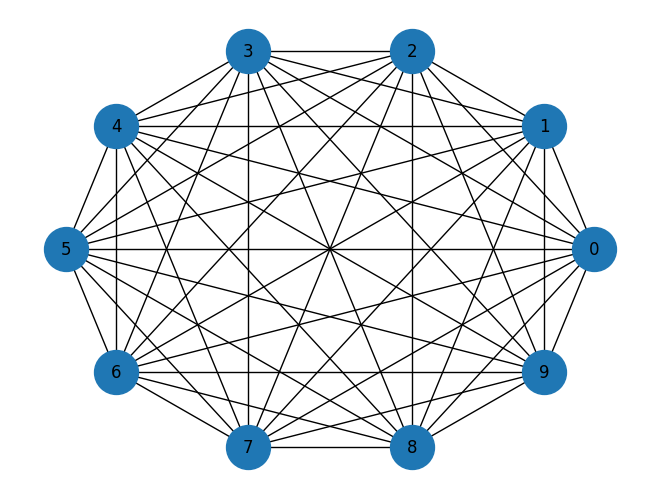

In [6]:
complete_G=make_complete_graph(10)
def draw_circular_graph(G):
    nx.draw_circular(G,
                    node_color='tab:blue',
                    node_size=1000,
                    with_labels=True
                    )
draw_circular_graph(complete_G)

In [7]:
print(list(complete_G.neighbors(0)))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [8]:
def reachable_nodes(G,start):
    seen=set()
    stack=[start]
    while stack:
        node=stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In [9]:
reachable_nodes(complete_G,0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [10]:
def is_connected(G):
    start=next(iter(G))
    reachable=reachable_nodes(G,start)
    return len(reachable)==len(G)

In [11]:
is_connected(complete_G)

True

In [12]:
def flip(p):
    return np.random.random()<p

In [13]:
def random_pairs(nodes,p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

In [14]:
def make_random_graph(n,p):
    G=nx.Graph()
    nodes=range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes,p))
    return G

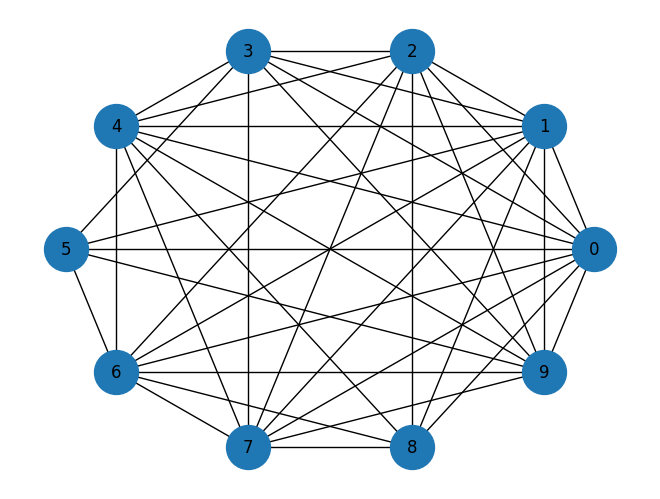

In [15]:
random_graph=make_random_graph(10,0.8)
draw_circular_graph(random_graph)

In [16]:
def prob_connected(n,p,iters=100):
    tf=[is_connected(make_random_graph(n,p)) for i in range(iters)]
    return np.mean(tf)
prob_connected(10,0.23,iters=1000)

0.375

In [107]:
n=10
ps=np.logspace(-2.5,0,200)
ys=[prob_connected(n,p) for p in ps]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.02, 0.01, 0.0, 0.0, 0.03, 0.02, 0.05, 0.01, 0.04, 0.07, 0.02, 0.07, 0.03, 0.07, 0.03, 0.08, 0.08, 0.13, 0.16, 0.12, 0.17, 0.17, 0.2, 0.24, 0.35, 0.29, 0.32, 0.25, 0.38, 0.34, 0.38, 0.5, 0.53, 0.53, 0.67, 0.57, 0.62, 0.64, 0.67, 0.67, 0.76, 0.82, 0.79, 0.81, 0.91, 0.87, 0.93, 0.87, 0.95, 0.95, 0.95, 0.94, 0.98, 0.94, 0.97, 0.99, 0.98, 0.99, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0,

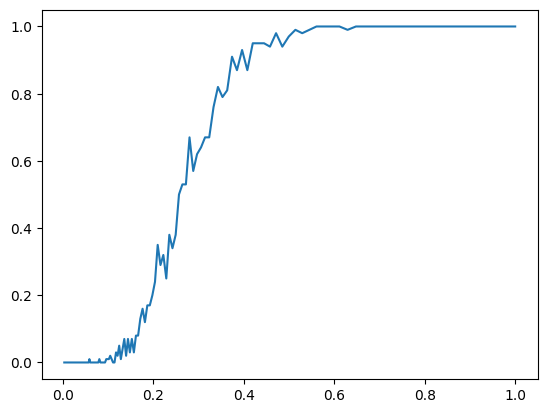

In [108]:
print(ys)
plt.plot(ps,ys)

In [109]:
def m_pairs(nodes,m):
    all_edges=[edge for edge in all_pairs(nodes)]
    max_edge_size=len(all_edges)
    edges_num= m if m<max_edge_size else max_edge_size
    chosen_index=np.random.choice(max_edge_size,size=edges_num,replace=False)
    chosen_edges=[all_edges[index] for index in chosen_index]
    # print(f'maximal edge num:{max_edge_size}\n random chosen {len(chosen_edges)} edges')
    return chosen_edges

def make_m_graph(n,m):
    G=nx.Graph()
    nodes=range(n)
    G.add_nodes_from(nodes)
    chosen_edges=m_pairs(nodes,m)
    G.add_edges_from(chosen_edges)
    return G

True

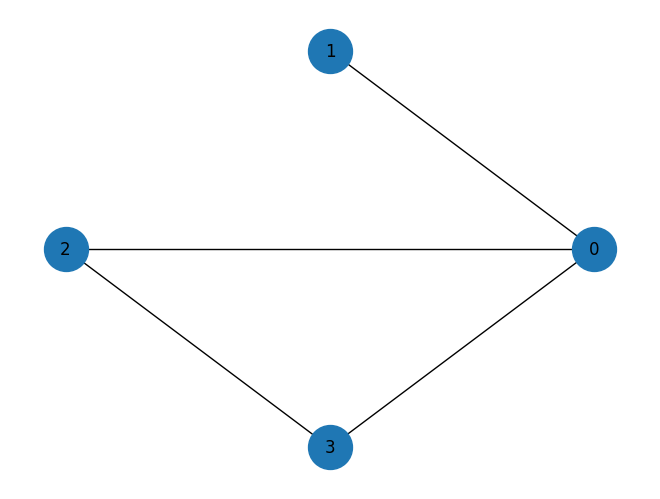

In [110]:
m_graph=make_m_graph(4,4)
draw_circular_graph(m_graph)
is_connected(m_graph)

In [111]:
def prob_m_connected(n,p,iters=100):
    tf=[is_connected(make_m_graph(n,p)) for i in range(iters)]
    return np.mean(tf)
prob_m_connected(4,4,iters=1000)

1.0

maximal edges=105 with 15 points


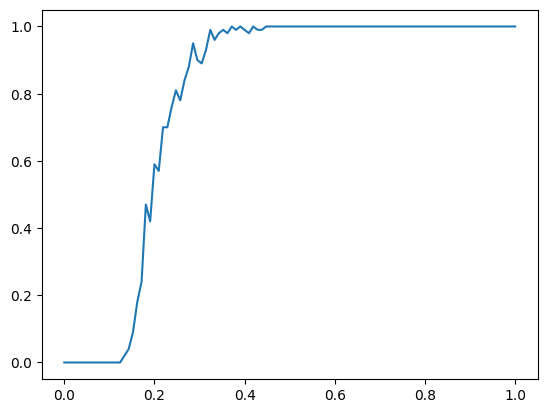

In [113]:
m=15
max_edges_num=len([edge for edge in all_pairs(range(m))])
print(f'maximal edges={max_edges_num} with {m} points')
prob=[prob_m_connected(m,i) for i in range(max_edges_num+1)]
edge_p=[i/max_edges_num for i in range(max_edges_num+1)]
plt.plot(edge_p,prob)